In [1]:
# Importing libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
# Download nltk resources

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Load the dataset

data = pd.read_csv('data/Symptom2Disease.csv') 

In [9]:
# display the dataset
data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [10]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [35]:
data['Gastroesophageal reflux disease']

KeyError: 'Gastroesophageal reflux disease'

In [12]:
# Concise summary of DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [13]:
# Check for null values

data.isnull().sum()

label    0
text     0
dtype: int64

In [14]:
# Display column names

data.columns

Index(['label', 'text'], dtype='object')

In [15]:
data.value_counts()

label                    text                                                                                                                                                                                                                                                
Jaundice                 I've been feeling extremely scratchy, sick, and worn out. In addition, I've lost weight and have a temperature. My urine is dark, and my skin has turned yellow. Additionally, I have been experiencing stomach pain.                                   4
Dimorphic Hemorrhoids    I've been constipated and it's really hard to go to the bathroom. When I do go, it hurts and my stool has been bloody. I've also been having some pain in my butt and my anus has been really itchy and irritated.                                      3
Arthritis                I've been feeling really weak in my muscles and my neck has been really stiff. My joints have been swelling up and it's hard for me to move around without 

In [16]:
# Extracting 'label' and 'text' columns from the 'data' DataFrame

labels = data['label']  
symptoms = data['text'] 

In [18]:
# Text Preprocessing

stop_words = set(stopwords.words('english'))

In [19]:
# Text Preprocessing Function

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Removing stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [20]:
# Apply preprocessing to symptoms

preprocessed_symptoms = symptoms.apply(preprocess_text)


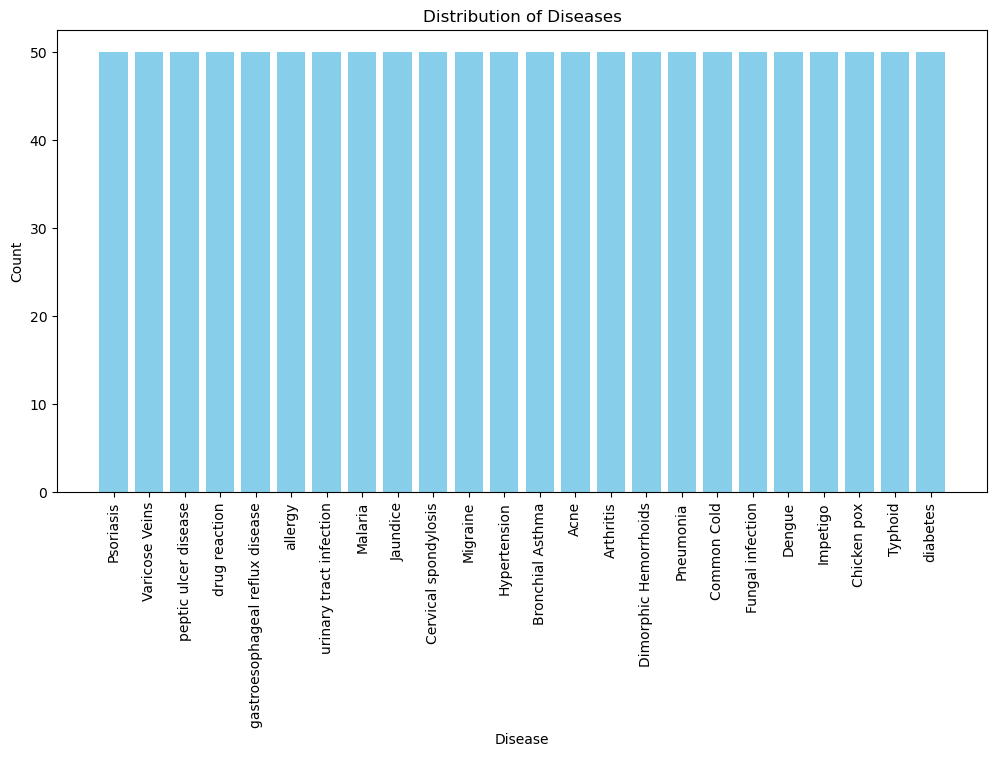

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each disease
disease_counts = data['label'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Feature Extraction using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # You can adjust max_features based on your dataset size
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()

In [23]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

In [24]:
# KNN Model Training

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your dataset
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Predictions

predictions = knn_classifier.predict(X_test)

In [26]:
# Model Evaluation

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.95
                                 precision    recall  f1-score   support

                           Acne       0.88      1.00      0.93         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.85      1.00      0.92        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.80      1.00      0.89        12
                    Common Cold       1.00      0.83      0.91        12
                         Dengue       0.92      0.92      0.92        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria    

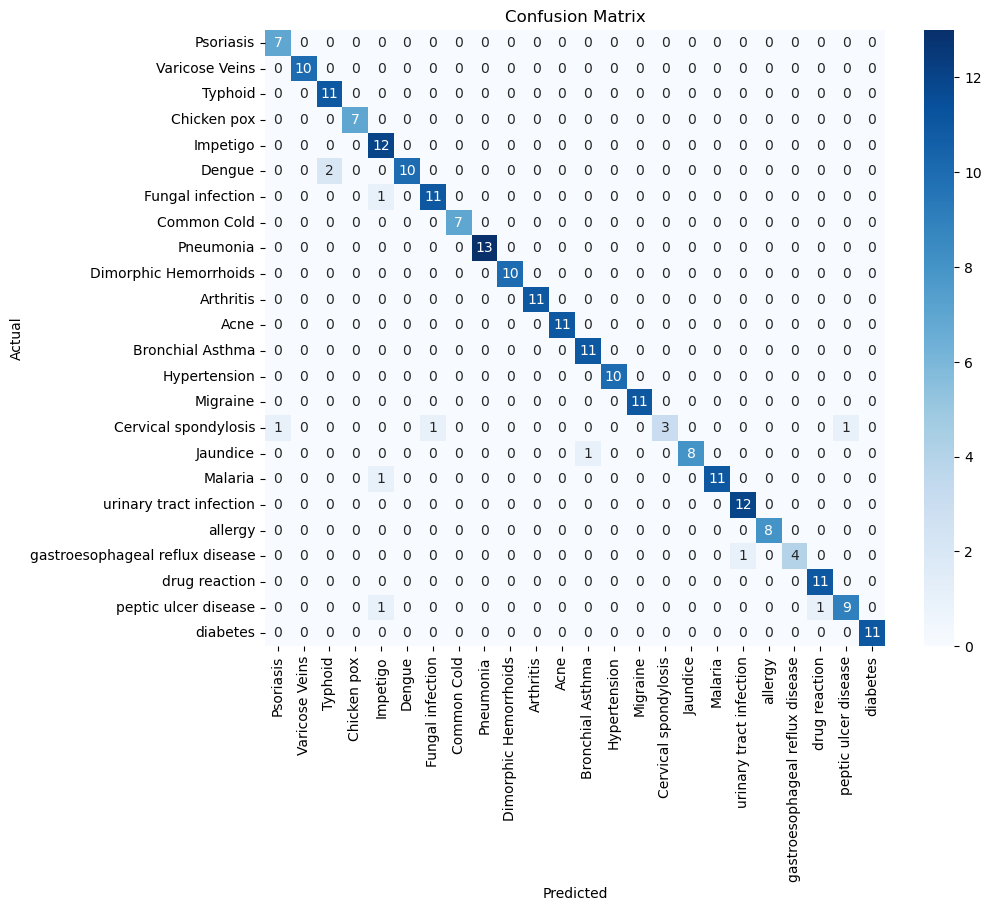

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Example Usage
symptom = "diffuculty to breath "

# Preprocess the input symptom
preprocessed_symptom = preprocess_text(symptom)

# Transform the preprocessed symptom using the same vectorizer used during training
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Predict the disease
predicted_disease = knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')


Predicted Disease: Bronchial Asthma
